In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from helpers import *
from helpers_image import *
from helpers_submission import *
from models import *

# TEMP
from helpers_tmp import *

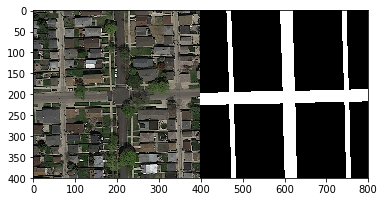

In [2]:
X, Y = load_training_dataset()#(sample_size=95)
Y = (Y > 0.5).astype(np.float32)
plt.imshow(concatenate_images(X[0], Y[0]))
plt.show()

In [3]:
X_train = X[0:95]
X_test = X[95:]
Y_train = Y[0:95]
Y_test = Y[95:]

# Load the model

The model is saved inside `model_dir/` so the training can be stop at anytime and restart form the same directory

In [ ]:
config = tf.estimator.RunConfig()
config._save_summary_steps = 20
#config._log_step_count_steps = 20
model_params = {"learning_rate": 0.00001}
my_estimator = tf.estimator.Estimator(model_fn=baseline_model_fn, model_dir="../model_dir_all3",
                                      params=model_params,config=config)

INFO:tensorflow:Using config: {'_master': '', '_model_dir': '../model_dir_all3', '_num_worker_replicas': 1, '_is_chief': True, '_service': None, '_num_ps_replicas': 0, '_task_id': 0, '_task_type': 'worker', '_log_step_count_steps': 100, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 20, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb14d0e0208>}


# Training
Start or continue training from the model saved at `model_dir`

In [ ]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X_train},
    y=Y_train,
    batch_size=1, #20,
    queue_capacity = 100,  # Important to avoid OOM Error
    num_epochs=None,
    shuffle=True)

test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X_test},
    y=Y_test,
    batch_size=1, #20,
    queue_capacity = 100,  # Important to avoid OOM Error
    num_epochs=1,
    shuffle=False)

#check
#my_estimator.train_and_evaluate()
#Train
my_estimator.train(input_fn=train_input_fn, steps=5000, saving_listeners=[
    EvalCheckpointSaverListener(
        my_estimator,
        test_input_fn
    )])

(1, 400, 400, 1)
(1, 160000)
(1, 160000)
--------
(1, 160000)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ../model_dir_all3/model.ckpt.
after_save
(?, 400, 400, 1)
(?, 160000)
(?, 160000)
--------
(?, 160000)
INFO:tensorflow:Summary name Loss test set is illegal; using Loss_test_set instead.
INFO:tensorflow:Starting evaluation at 2017-12-08-23:55:37
INFO:tensorflow:Restoring parameters from ../model_dir_all3/model.ckpt-1
INFO:tensorflow:Finished evaluation at 2017-12-08-23:55:38
INFO:tensorflow:Saving dict for global step 1: global_step = 1, loss = 109460.0
loss on test set{'loss': 109460.08, 'global_step': 1}
INFO:tensorflow:step = 1, loss = 110322.0
INFO:tensorflow:global_step/sec: 3.03445
INFO:tensorflow:step = 101, loss = 93756.8 (32.956 sec)
INFO:tensorflow:global_step/sec: 3.09057
INFO:tensorflow:step = 201, loss = 88526.4 (32.357 sec)
INFO:tensorflow:global_step/sec: 3.02913
INFO:tensorflow:step = 301, loss = 93000.9 (33.014 sec)
INF

## Prediction on the training set

In [ ]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X},
    num_epochs=1,
    batch_size= 10,
    queue_capacity = 10,
    shuffle=False)

predictions = [p for p in my_estimator.predict(input_fn=predict_input_fn)]

In [ ]:
pred = np.array([p>0.5 for p in predictions])
Y_bin = np.array([y>0.5 for y in Y])
sk_mean_F1_score(Y_bin, pred)

In [ ]:
def sk_mean_F1_score2(prediction, groundtruth):
    return f1_score(np.reshape(prediction, [-1]), np.reshape(groundtruth, [-1]), average='macro')

In [ ]:
sk_mean_F1_score2(Y_bin, pred)

In [ ]:
for i, p in enumerate(predictions):
    threshold = 0.9
    print(np.sum(p>threshold))
    #plt.imshow(concatenate_images(X[i], np.array(p>threshold)))
    plt.imshow(p)
    plt.show()

# Reference:

How to create your own [estimator](https://www.tensorflow.org/extend/estimators) 

# TODO:
    - Change the loss function form sum to mean (and look for a know working situation if we need to change the learning rate) 